In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Basic descriptive statistics
descriptive_stats = df.describe()


mode_values = df.mode().iloc[0]

# Adding mode to the descriptive statistics
descriptive_stats.loc['mode'] = mode_values

print(descriptive_stats)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   
mode      1.000000   99.000000      70.000000       0.000000    0.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160            

In [5]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

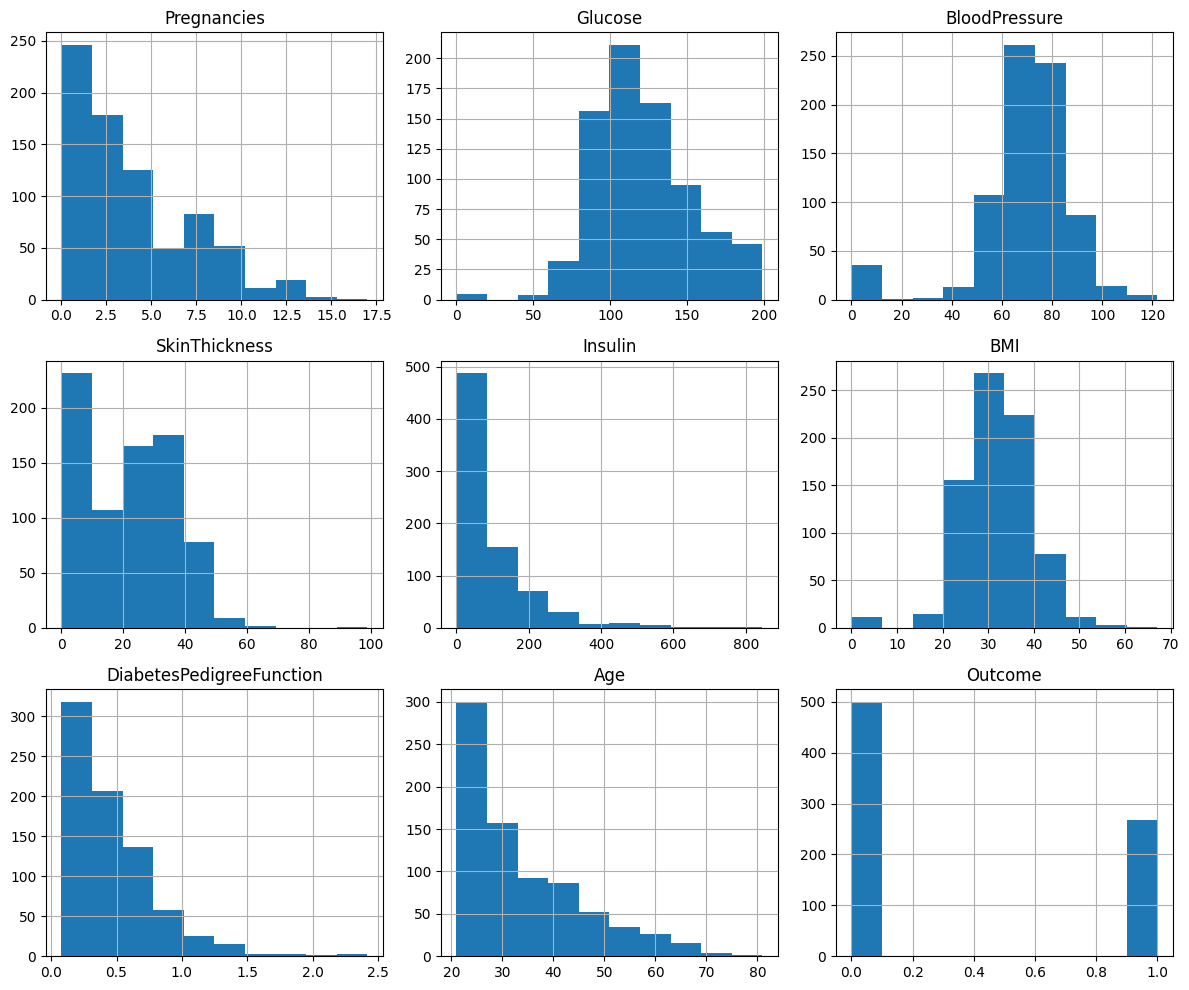

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

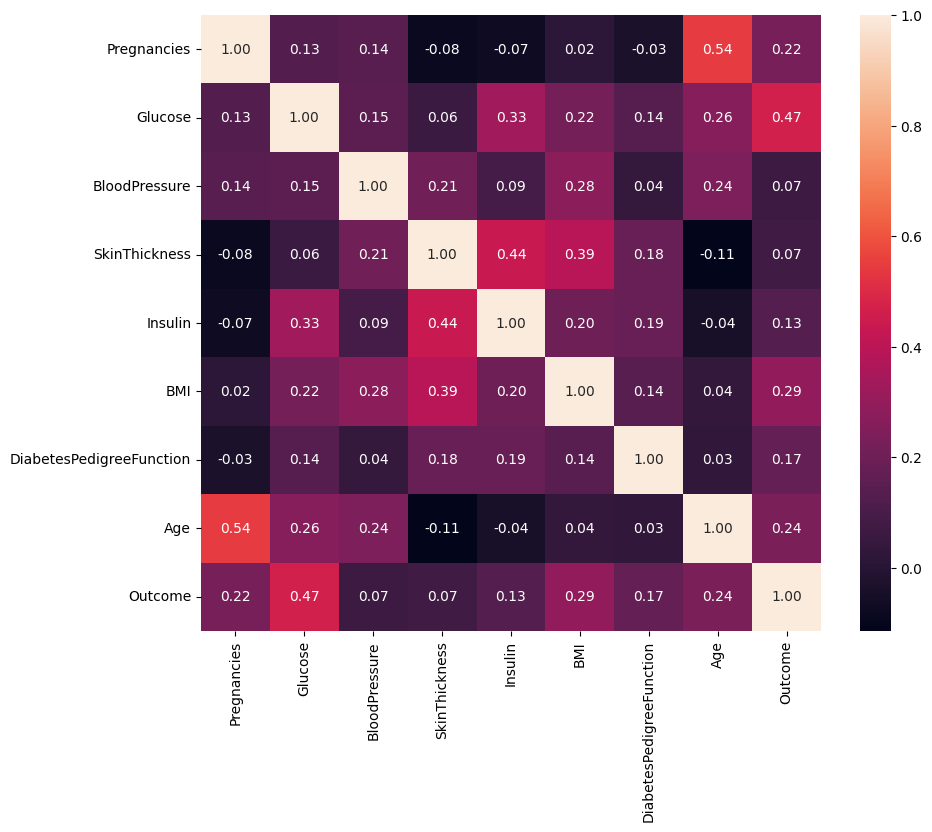

In [7]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [8]:
# For columns with zeros that should be NaN
columns_with_zeros = ['Insulin', 'SkinThickness']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, pd.NA)
# Impute missing values using the median
df.fillna(df.median(), inplace=True)


/tmp/ipykernel_33/3676662541.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Outcome', axis=1)), columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']


In [10]:
# Define features and target variable here
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report
predictions = rf_model.predict(X_test)
print('Classification report of Random Forest Classifier')
print(classification_report(y_test, predictions))


Classification report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
best_parameters = grid_search.best_params_
print("Best parameters found by grid search:", grid_search.best_params_, "\n")

Best parameters found by grid search: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} 



In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_mean)
print("Standard deviation of cross-validation scores:", cv_std, "\n")

Cross-validation scores: [0.77272727 0.74025974 0.77922078 0.83006536 0.76470588]
Mean cross-validation score: 0.7773958068075715
Standard deviation of cross-validation scores: 0.02945956257138875 



In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize models
gb = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)

# List of models
models = [rf, gb, svc, mlp]

# Dictionary to hold scores
model_scores = {}

# Evaluate each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5)
    model_scores[model_name] = scores.mean()

    
print("Model performance comparison:")
for model_name, score in model_scores.items():
    print(model_name, "mean CV score:", score)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model performance comparison:
RandomForestClassifier mean CV score: 0.7773958068075715
GradientBoostingClassifier mean CV score: 0.7708598590951532
SVC mean CV score: 0.7604702487055428
MLPClassifier mean CV score: 0.7617689500042442


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
